Given an `m x n` grid of characters `board` and a string `word`, return `true` *if* `word` *exists in the grid*.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

<br>

**Example 1:**

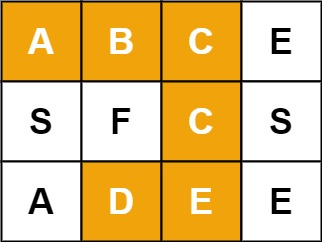

>**Input:** board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED"<br>
>**Output:** true

**Example 2:**

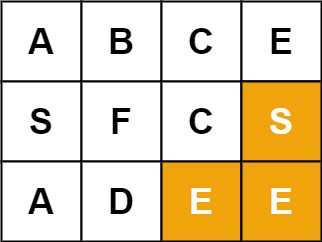

>**Input:** board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "SEE"<br>
>**Output:** true

**Example 3:**

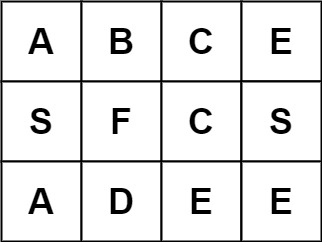

>**Input:** board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCB"<br>
>**Output:** false

<br>

**Constraints:**
- >m == board.length
- >n = board[i].length
- >1 <= m, n <= 6
- >1 <= word.length <= 15
- >board and word consists of only lowercase and uppercase English letters.

<br><br>

**Follow up:** Could you use search pruning to make your solution faster with a larger `board`?

In [1]:
class Solution:
    def exist(self, board: list[list[str]], word: str) -> bool:
        def backtrack(row, col, index):
            if index == len(word):
                return True
            
            if row < 0 or row >= m or col < 0 or col >= n or board[row][col] != word[index]:
                return False
            
            temp = board[row][col]
            board[row][col] = '#'
            
            found = (backtrack(row + 1, col, index + 1) or
                    backtrack(row - 1, col, index + 1) or
                    backtrack(row, col + 1, index + 1) or
                    backtrack(row, col - 1, index + 1))
            
            board[row][col] = temp
            
            return found
        
        m, n = len(board), len(board[0])
        
        for i in range(m):
            for j in range(n):
                if backtrack(i, j, 0):
                    return True
        
        return False